# 0. Veri Setinin Hazırlanması

In [1]:
# Veri Analizi İçin Kullanacağım Kütüphaneleri çağırdım

import pandas as pd
import numpy as np

# Analiz edilen verileri görselleştirmek için gerekli kütüphaneleri çağırdım

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Veri setini notebook içine dahil ettim

df_ = pd.read_csv(filepath_or_buffer="/kaggle/input/sf-salaries/Salaries.csv", low_memory=False) # filepath_or_buffer → argüman olarak 
# İşlenmemiş veri setini df_ içerisinde tuttuktan sonra df değişkenine kopyaladık (ham veri setinde değişiklik yapmamak için)
df = df_.copy() 

## Veri Seti İçerisinde NaN Değer Kontrolü

In [3]:
# Veri setinde başlangıçta eksik değer olup olmadığını kontrol et
nan_count = df.isna().sum().sum()

if nan_count > 0:
    print(f"Veri setinde başlangıçta {nan_count} adet eksik değer var.")
    
    # Eksik değer içeren sütunları ve her bir sütundaki eksik değer sayısını göster
    missing_columns = df.isna().sum()[df.isna().sum() > 0]
    print("\nEksik değer içeren sütunlar ve eksik değer sayıları:")
    print(missing_columns)
    
    # Eksik değer içeren sütunlardan örnek satırları göster
    print("\nEksik değer içeren satırlardan örnekler:")
    print(df[df.isna().any(axis=1)].head())
else:
    print("Veri setinde başlangıçta eksik değer yok.")


Veri setinde başlangıçta 295953 adet eksik değer var.

Eksik değer içeren sütunlar ve eksik değer sayıları:
BasePay        605
Benefits     36159
Notes       148654
Status      110535
dtype: int64

Eksik değer içeren satırlardan örnekler:
   Id       EmployeeName                                        JobTitle  \
0   1     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2   3     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3   4  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4   5    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

     BasePay OvertimePay   OtherPay Benefits   TotalPay  TotalPayBenefits  \
0  167411.18         0.0  400184.25      NaN  567595.43         567595.43   
1  155966.02   245131.88  137811.38      NaN  538909.28         538909.28   
2  212739.13   106088.18    16452.6      NaN  335279.91         335279.91

* Veri seti içerisinde NaN değerler olduğundan tekrar NaN değerler eklemedim ancak eklemek isteseydim aşağıdaki kodu kullanacaktım.

In [4]:
# import random
# import pandas as pd
# import numpy as np

# # Veri setini notebook içine dahil ettim
# df_ = pd.read_csv(filepath_or_buffer = "/kaggle/input/sf-salaries/Salaries.csv")
# df = df_.copy()  # Orijinal veri setini kopyaladık

# # Rastgele eksik veri ekleyen fonksiyon
# def add_random_missing_values(dataframe: pd.DataFrame,
#                               missing_rate: float = 0.05,
#                               seed: int = 42) -> pd.DataFrame:
#     """
#     DataFrame'e belirtilen oranda rastgele NaN (eksik) değerler ekler.
    
#     Parameters:
#     - dataframe (pd.DataFrame): Eksik değer eklenecek DataFrame.
#     - missing_rate (float): Eksik değer oranı. Varsayılan 0.05 (%5).
#     - seed (int): Rastgelelik için kullanılacak seed. Varsayılan 42.
    
#     Returns:
#     - pd.DataFrame: Eksik (NaN) değerler eklenmiş DataFrame.
#     """
#     # DataFrame'in bir kopyasını oluştur
#     df_missing = dataframe.copy()

#     # Eksik değer sayısını hesapla
#     total_values = dataframe.size
#     num_missing = int(total_values * missing_rate)

#     # Rastgelelik için seed ayarla
#     random.seed(seed)

#     # Satır ve sütun indekslerini seçerek hücrelere NaN ekle
#     chosen_indices = set()  # Seçilen indeksleri saklamak için bir set kullan
#     for _ in range(num_missing):
#         while True:
#             row_idx = random.randint(0, dataframe.shape[0] - 1)
#             col_idx = random.randint(0, dataframe.shape[1] - 1)
#             if (row_idx, col_idx) not in chosen_indices:
#                 chosen_indices.add((row_idx, col_idx))
#                 df_missing.iat[row_idx, col_idx] = np.nan
#                 break

#     return df_missing

# df = add_random_missing_values(dataframe = df,
#                                missing_rate = 0.03)

# 1. Verileri İnceleme

In [5]:
df.head(n = 1) # ilk veriyi görmek için

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN


In [6]:
df.tail(n = 1) # son veriyi görmek için

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.00,0.00,-618.13,0.00,-618.13,-618.13,2014,NaN,San Francisco,PT


In [7]:
# Veri setindeki satır ve sütun sayılarına bakalım
df.shape # → (satır, sütun)

(148654, 13)

In [8]:
# Veri setindeki değişkenlerin isimlerine bakalım
print(list(df.columns), '\n')

# len() fonk. ile toplam kolon sayısına bakalım
print(f"Veri seti içerisindeki toplam {len(df.columns)} kolon vardır.\n")

# Veri tipine bakmak istiyorum
print(f"df.columns' un döndüğü veri tipi : {type(df.columns)} \n")

['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency', 'Status'] 

Veri seti içerisindeki toplam 13 kolon vardır.

df.columns' un döndüğü veri tipi : <class 'pandas.core.indexes.base.Index'> 



In [9]:
# İnfo() metoduyla veri setine ait yapısal bilgilere bakalım

df.info()
# Sadece elimizdeki değişkenleri görmek için → df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [10]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay              object
OvertimePay          object
OtherPay             object
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status               object
dtype: object

In [11]:
# Kategorik ve sayısal değişkenleri ayırma
categorical_features = [col for col in df.columns if (df[col].dtype == "object") or (df[col].dtype == "category")]
"""
df.columns: Tüm kolon isimlerini döner.
col for col in df.columns: Kolon isimlerini döngüde tek tek dolaşır.
if (df[col].dtype == "object") or (df[col].dtype == "category"): Kolonun veri türü object veya category ise, bu kolonu listeye ekler.
"""
numerical_features = [col for col in df.columns if df[col].dtype not in ["object", "category"]]
"""
if df[col].dtype not in ["object", "category"]: Veri türü object veya category değilse, bu kolonu sayısal listeye ekler.
"""
# Sonuçları yazdırma
print("Kategorik değişkenler:", categorical_features)
print("Sayısal değişkenler:", numerical_features)


Kategorik değişkenler: ['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'Agency', 'Status']
Sayısal değişkenler: ['Id', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes']


In [12]:
categorical_features, numerical_features

(['EmployeeName',
  'JobTitle',
  'BasePay',
  'OvertimePay',
  'OtherPay',
  'Benefits',
  'Agency',
  'Status'],
 ['Id', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes'])

## Veri Setini Tanımak 

In [13]:
"""
Kategorik Değişkenler:
-----------------------
EmployeeName - Çalışan Adı
Çalışanın adı. Bu kolon, her bir çalışanın kimliğini temsil eder. Çalışanları tanımlamak için kullanılır.

JobTitle - İş Unvanı
Çalışanın iş unvanı veya pozisyonu. Örneğin, "Software Engineer", "Data Scientist" gibi. Bu kolon, çalışanın hangi rolde çalıştığını belirtir.

BasePay - Temel Maaş
Çalışanın temel maaşı. Bu kolon, çalışanın aldığı sabit maaşı gösterir. Ancak veri tipi genellikle sayısal olmayan (object), bu yüzden sayısal verilere dönüştürülmesi gerekebilir.

OvertimePay - Fazla Mesai Ücreti
Çalışanın fazla mesai için aldığı ödeme. Eğer çalışan fazla mesai yapıyorsa, bu kolon ona ödenen ek ücreti içerir.

OtherPay - Diğer Ödemeler
Çalışanın aldığı diğer ödemeler (ikramiye, ödüller vb.). Bu kolon, çalışanın maaş dışında aldığı herhangi bir ek ödemeyi belirtir.

Benefits - Yararlar
Çalışanın sosyal hakları veya ek yararları. Örneğin, sigorta, emeklilik planları gibi faydalar.

Agency - Ajans
Çalışanın bağlı olduğu ajans veya şirketin adı. Bu kolon, çalışanın hangi ajans veya kurumda çalıştığını gösterir.

Status - Durum
Çalışanın iş durumu. Örneğin, "Aktif", "Emekli" gibi. Bu kolon, çalışanın görevde olup olmadığını gösterir.

Sayısal Değişkenler:
----------------------
Id - Kimlik Numarası
Her bir çalışanın benzersiz kimlik numarası. Bu kolon, çalışanın veritabanındaki kimliğini tanımlar.

TotalPay - Toplam Ödeme
Çalışanın aldığı toplam ödeme. Hem temel maaş hem de fazla mesai gibi tüm ödemelerin toplamını içerir.

TotalPayBenefits - Toplam Ödeme ve Yararlar
Çalışanın aldığı toplam ödeme ve yararları içerir. Bu kolon, toplam ödeme ve sosyal haklar gibi yararların toplamını gösterir.

Year - Yıl
Ödemelerin yapıldığı yıl. Bu kolon, ödemelerin hangi yılda yapıldığını gösterir. Örneğin, 2011, 2012 gibi.

Notes - Notlar
Çalışanla ilgili ek notlar. Bu kolon, çalışana dair herhangi bir özel durumu veya açıklamayı içerebilir. Genellikle sayısal olmayan veriler içerir.
"""

'\nKategorik Değişkenler:\n-----------------------\nEmployeeName - Çalışan Adı\nÇalışanın adı. Bu kolon, her bir çalışanın kimliğini temsil eder. Çalışanları tanımlamak için kullanılır.\n\nJobTitle - İş Unvanı\nÇalışanın iş unvanı veya pozisyonu. Örneğin, "Software Engineer", "Data Scientist" gibi. Bu kolon, çalışanın hangi rolde çalıştığını belirtir.\n\nBasePay - Temel Maaş\nÇalışanın temel maaşı. Bu kolon, çalışanın aldığı sabit maaşı gösterir. Ancak veri tipi genellikle sayısal olmayan (object), bu yüzden sayısal verilere dönüştürülmesi gerekebilir.\n\nOvertimePay - Fazla Mesai Ücreti\nÇalışanın fazla mesai için aldığı ödeme. Eğer çalışan fazla mesai yapıyorsa, bu kolon ona ödenen ek ücreti içerir.\n\nOtherPay - Diğer Ödemeler\nÇalışanın aldığı diğer ödemeler (ikramiye, ödüller vb.). Bu kolon, çalışanın maaş dışında aldığı herhangi bir ek ödemeyi belirtir.\n\nBenefits - Yararlar\nÇalışanın sosyal hakları veya ek yararları. Örneğin, sigorta, emeklilik planları gibi faydalar.\n\nAgenc

Categorical → Category (Categorical veri tipi object dışında farklı veriler tuttuğu için çevirmeliyiz) neden ? 

In [14]:
"""
Object veri tipi, genel olarak metin veya string verilerini tutmak için kullanılır, ancak kategorik veriler için daha az verimli olabilir.
Categorical veri tipi, sadece belirli bir dizi kategoriyi tutarak belleği daha verimli kullanır ve veri analizinde daha hızlı ve daha doğru sonuçlar sağlar.
Eğer veri setinde kategorik (sınıflandırılabilir) veriler varsa, bu kolonları Categorical veri tipine dönüştürmek, veri setinin yönetimini, temizliğini ve analizini daha verimli hale getirir.
Bu yüzden Categorical veri tipi, veri analizi ve modelleme sürecinde daha anlamlı ve daha etkili bir seçenek olabilir.
"""

'\nObject veri tipi, genel olarak metin veya string verilerini tutmak için kullanılır, ancak kategorik veriler için daha az verimli olabilir.\nCategorical veri tipi, sadece belirli bir dizi kategoriyi tutarak belleği daha verimli kullanır ve veri analizinde daha hızlı ve daha doğru sonuçlar sağlar.\nEğer veri setinde kategorik (sınıflandırılabilir) veriler varsa, bu kolonları Categorical veri tipine dönüştürmek, veri setinin yönetimini, temizliğini ve analizini daha verimli hale getirir.\nBu yüzden Categorical veri tipi, veri analizi ve modelleme sürecinde daha anlamlı ve daha etkili bir seçenek olabilir.\n'

In [15]:
# Kategorik sütunları Categorical veri tipine dönüştürme
df['EmployeeName'] = df['EmployeeName'].astype('category')
df['JobTitle'] = df['JobTitle'].astype('category')
df['BasePay'] = df['BasePay'].astype('category')
df['OvertimePay'] = df['OvertimePay'].astype('category')
df['OtherPay'] = df['OtherPay'].astype('category')
df['Benefits'] = df['Benefits'].astype('category')
df['Agency'] = df['Agency'].astype('category')
df['Status'] = df['Status'].astype('category')


In [16]:
df.dtypes # Category 'ye çevrilmiş

Id                     int64
EmployeeName        category
JobTitle            category
BasePay             category
OvertimePay         category
OtherPay            category
Benefits            category
TotalPay             float64
TotalPayBenefits     float64
Year                   int64
Notes                float64
Agency              category
Status              category
dtype: object

In [17]:
df['OvertimePay'][:3]
# Kategorik veriler → nominal(sıralı olmayan), ordinal(sıralı olan) olarak ayrılır ve üzerinde değişim yapmak için kategorik verilere çevirdik

0          0.0
1    245131.88
2    106088.18
Name: OvertimePay, dtype: category
Categories (66162, object): ['-0.01', '0.0', '0.00', '0.02', ..., '9999.25', '9999.41', '9999.83', 'Not Provided']

In [18]:
df.describe(include = "all").T # -> .T eklentisi elde edeceğimiz çıktıyı transpose eder.


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,148654.0,NaN,NaN,NaN,74327.5,42912.857795,1.0,37164.25,74327.5,111490.75,148654.0
EmployeeName,148654,110811,Kevin Lee,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JobTitle,148654,2159,Transit Operator,7036,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BasePay,148049,109724,0.0,872,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OvertimePay,148654,66162,0.0,57868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OtherPay,148654,84243,0.0,30068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Benefits,112495,98647,0.0,1024,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalPay,148654.0,NaN,NaN,NaN,74768.321972,50517.005274,-618.13,36168.995,71426.61,105839.135,567595.43
TotalPayBenefits,148654.0,NaN,NaN,NaN,93692.554811,62793.533483,-618.13,44065.65,92404.09,132876.45,567595.43
Year,148654.0,NaN,NaN,NaN,2012.522643,1.117538,2011.0,2012.0,2013.0,2014.0,2014.0


# 2.Eksik Veri Analizi

* veri setindeki eksik veri sayılarına bakmak için:

In [19]:
df.isna().sum() # -> isna() methodu yerine isnull() methodu da kullanılabilir.

# ALIŞTIRMA: Her bir değişken için, o değişkendeki eksik değer sayısının toplam kayıt sayısının % kaçı olduğunu bulunuz.

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

In [20]:
df.isna().sum().sum() # toplam eksik veri sayısı

295953

In [21]:
# Eksik olmayan değerlerin sayısı
df.notnull().sum()

Id                  148654
EmployeeName        148654
JobTitle            148654
BasePay             148049
OvertimePay         148654
OtherPay            148654
Benefits            112495
TotalPay            148654
TotalPayBenefits    148654
Year                148654
Notes                    0
Agency              148654
Status               38119
dtype: int64

* eksik verilerin yüzde  cinsinden görüntülenmesi:

In [22]:
# Eksik değerlerin yüzde cinsinden oranını hesapla
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Sonuçları bir tablo olarak görüntüle
print(missing_percentage)


Id                    0.000000
EmployeeName          0.000000
JobTitle              0.000000
BasePay               0.406985
OvertimePay           0.000000
OtherPay              0.000000
Benefits             24.324270
TotalPay              0.000000
TotalPayBenefits      0.000000
Year                  0.000000
Notes               100.000000
Agency                0.000000
Status               74.357232
dtype: float64


In [23]:
# Veri setinde toplam kaç adet eksik gözlem var, kaç adet eksik olmayan gözlem var görelim.
print(f"Veri seti içerisinde toplam {df.notnull().sum().sum()} adet eksik olmayan, {df.isnull().sum().sum()} eksik gözlem var.")

Veri seti içerisinde toplam 1636549 adet eksik olmayan, 295953 eksik gözlem var.


In [24]:
# Veri setinde en az bir gözlemi eksik olan kayıtlara da ulaşabiliriz.
df[df.isnull().any(axis = 1)]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN


In [25]:
# Hiç eksik gözlemi bulunmayan kayıtları getirelim.
df[df.notnull().all(axis = 1)][:5]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status


* Yukarıda da görüldüğü gibi her kayıtta eksik veri bulunmaktadır.

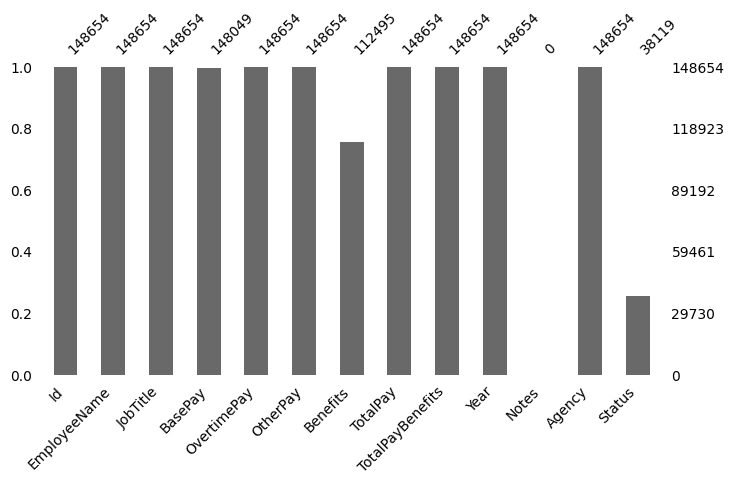

In [26]:

import missingno as msno

msno.bar(df = df,
         figsize = (8, 4),
         fontsize = 10);

* Yukarıda da görüldüğü gibi notes sütunu hiçbir veri içermediğinden o kolonu iptal etmeyi tercih ettim.

### Tamamen Boş Olan Notes Sütunu Silindi

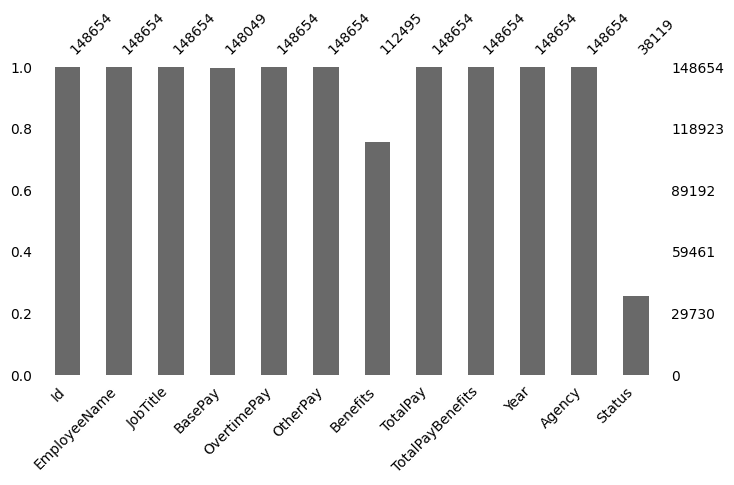

In [27]:
df.drop(columns=['Notes'], inplace=True)
# Notes sütununu sildim ve tekrar görselleştirdim:

import missingno as msno

msno.bar(df = df,
         figsize = (8, 4),
         fontsize = 10);

* BasePay ve Benefits eksik verileri anlamlı bir şekilde dolabilir. Bunların eksik veri ilişkisini görmek faydalı olabilir.
Status ise çok yüksek eksik veri yüzdesine sahip, bunu da analiz etmek ilginç olabilir. Bu yüzden bu sütunları görselleştirdim

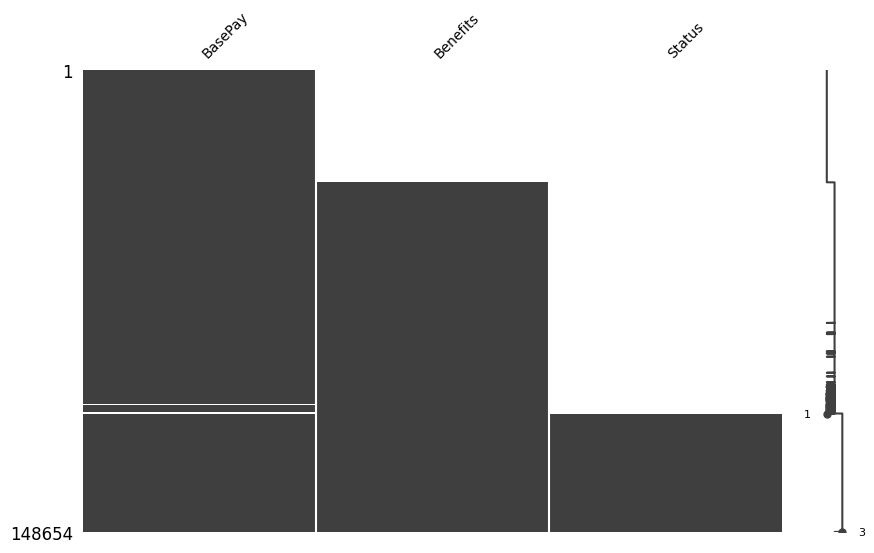

In [28]:
import missingno as msno
import matplotlib.pyplot as plt

# Eksik verileri olan anlamlı sütunları seçelim
selected_columns = ['BasePay', 'Benefits', 'Status']

# Eksik değerlerin görselleştirilmesi
msno.matrix(df=df[selected_columns], figsize=(10, 6), fontsize=10)
plt.show()


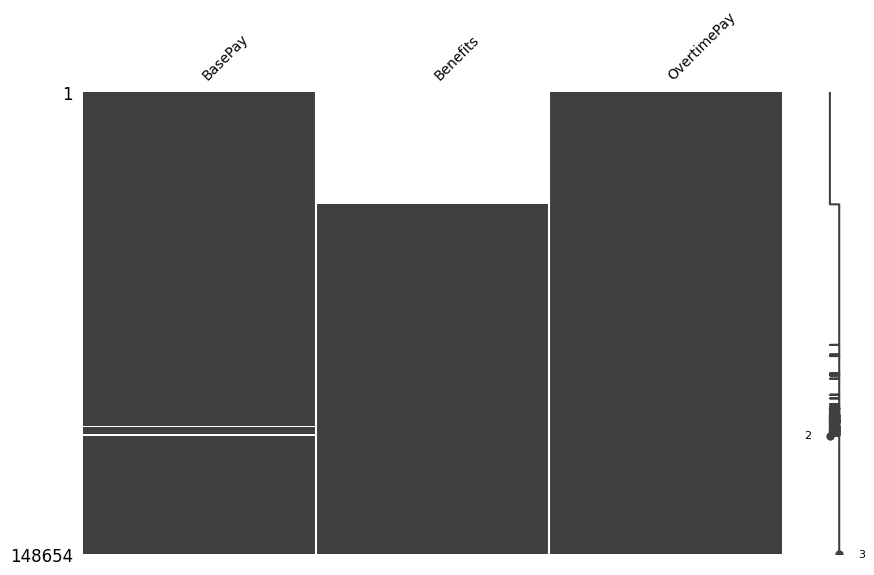

In [29]:

import missingno as msno
import matplotlib.pyplot as plt

selected_columns = ['BasePay', 'Benefits', 'OvertimePay'] # Diğer Sütunlarıda merak ettim ve görselleştirdim

# Eksik değerlerin görselleştirilmesi
msno.matrix(df=df[selected_columns], figsize=(10, 6), fontsize=10)
plt.show()

* BasePay sütununda eksik verileri gözlemledim

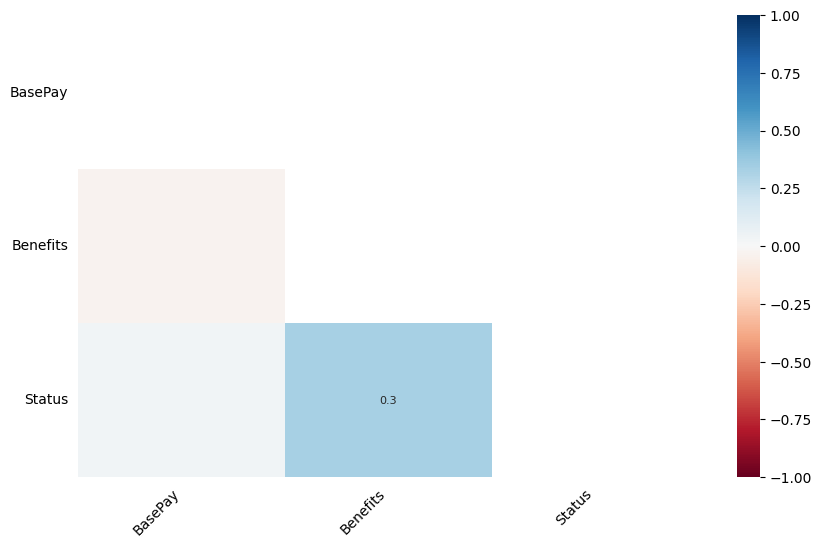

In [30]:
# Nullity Correlation (Heatmap)
# 1'e ne kadar yakınsa, ilişki ihtimali o kadar yüksek.
# 0 ise, birbirlerini etkileyen bir durum yoktur.
msno.heatmap(df = df,
             figsize = (10, 6),
             fontsize = 10);

* Özellikle Benefits ve Status arasında korelasyon değeri yaklaşık 0.3 gibi görünüyor, bu da zayıf ama mevcut bir ilişki olduğunu gösteriyor.

## 2.1 Eksik Verilerin Doldurulması

In [31]:
# Doldurma işlemlerini gerçekleştirmek için veri setimin bir kopyasını oluşturuyorum.
df_fillna = df.copy()

df_fillna.head(3)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,San Francisco,NaN


### 2.1.1 Sayısal Verilerin Doldurulması

In [32]:
# BasePay (%0.41 eksik): Sayısal bir sütun ve az eksik veri oranına sahip. Ortalama ile doldurmak mantıklı.
# Benefits (%24.32 eksik): Yan haklarla ilgili sayısal bir sütun. Daha fazla eksik veri oranına sahip, yine ortalama ile doldurmak mantıklı.

In [33]:
# Sayısal sütunları ortalama ile doldur
df_fillna['TotalPay'] = df_fillna['TotalPay'].fillna(df_fillna['TotalPay'].mean())  # Ortalama ile doldur
df_fillna['TotalPayBenefits'] = df_fillna['TotalPayBenefits'].fillna(df_fillna['TotalPayBenefits'].mean())  # Ortalama ile doldur

# Doldurma işlemi sonrası veri kontrolü
print(df_fillna.head(3))
print(df_fillna.isnull().sum())



   Id    EmployeeName                                        JobTitle  \
0   1  NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2    GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2   3  ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   

     BasePay OvertimePay   OtherPay Benefits   TotalPay  TotalPayBenefits  \
0  167411.18         0.0  400184.25      NaN  567595.43         567595.43   
1  155966.02   245131.88  137811.38      NaN  538909.28         538909.28   
2  212739.13   106088.18    16452.6      NaN  335279.91         335279.91   

   Year         Agency Status  
0  2011  San Francisco    NaN  
1  2011  San Francisco    NaN  
2  2011  San Francisco    NaN  
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0


### 2.1.2 Kategorik Verilerin Doldurulması

In [34]:
# Kategorik sütunları en sık görülen değerle doldur
df_fillna['EmployeeName'] = df_fillna['EmployeeName'].fillna(df_fillna['EmployeeName'].mode()[0])  # En sık görülen değer ile doldur
df_fillna['JobTitle'] = df_fillna['JobTitle'].fillna(df_fillna['JobTitle'].mode()[0])  # En sık görülen değer ile doldur
df_fillna['BasePay'] = df_fillna['BasePay'].fillna(df_fillna['BasePay'].mode()[0])  # En sık görülen değer ile doldur
df_fillna['OvertimePay'] = df_fillna['OvertimePay'].fillna(df_fillna['OvertimePay'].mode()[0])  # En sık görülen değer ile doldur
df_fillna['OtherPay'] = df_fillna['OtherPay'].fillna(df_fillna['OtherPay'].mode()[0])  # En sık görülen değer ile doldur
df_fillna['Benefits'] = df_fillna['Benefits'].fillna(df_fillna['Benefits'].mode()[0])  # En sık görülen değer ile doldur
df_fillna['Agency'] = df_fillna['Agency'].fillna(df_fillna['Agency'].mode()[0])  # En sık görülen değer ile doldur
df_fillna['Status'] = df_fillna['Status'].fillna(df_fillna['Status'].mode()[0])  # En sık görülen değer ile doldur

* doldurulmuş mu diye kontrol ediyorum

In [35]:
# Doldurma işlemi sonrası veri kontrolü
print(df_fillna.head(3))  # İlk 3 satırı kontrol et
print(df_fillna.isnull().sum())  # Eksik değer sayısını kontrol et


   Id    EmployeeName                                        JobTitle  \
0   1  NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2    GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2   3  ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   

     BasePay OvertimePay   OtherPay Benefits   TotalPay  TotalPayBenefits  \
0  167411.18         0.0  400184.25      0.0  567595.43         567595.43   
1  155966.02   245131.88  137811.38      0.0  538909.28         538909.28   
2  212739.13   106088.18    16452.6      0.0  335279.91         335279.91   

   Year         Agency Status  
0  2011  San Francisco     FT  
1  2011  San Francisco     FT  
2  2011  San Francisco     FT  
Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
Status              0
dtype:

* Kategorik ve nümerik olarak eksik verilerimi doldurdum

* Son bir kontrol yaptım

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
Status              0
dtype: int64


<Axes: >

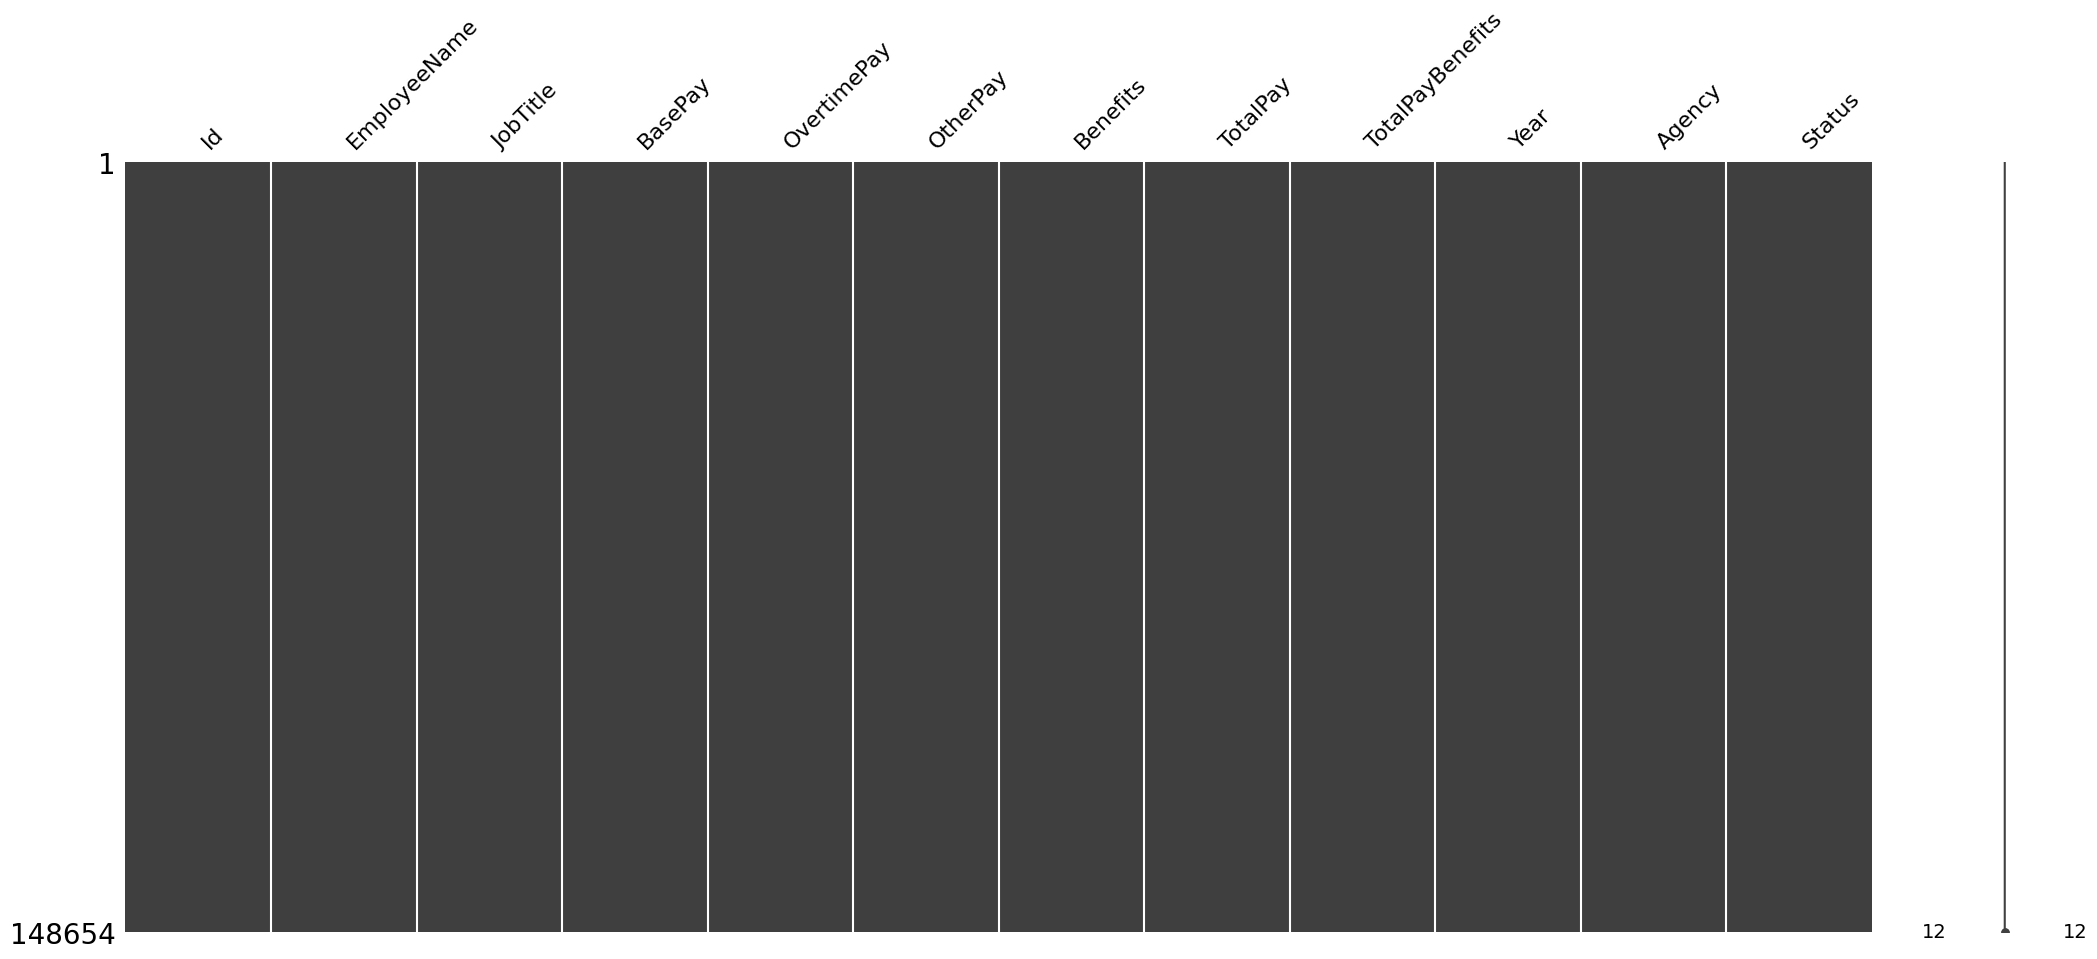

In [36]:
# Veri setindeki tüm eksik değerlerin kontrolü
print(df_fillna.isnull().sum())  # Eksik değer sayısını her sütun için gösterir
import missingno as msno
msno.matrix(df_fillna)  # Eksik verileri görselleştirir


In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,148654.0,74327.500000,42912.857795,1.00,37164.250,74327.50,111490.750,148654.00
TotalPay,148654.0,74768.321972,50517.005274,-618.13,36168.995,71426.61,105839.135,567595.43
TotalPayBenefits,148654.0,93692.554811,62793.533483,-618.13,44065.650,92404.09,132876.450,567595.43
Year,148654.0,2012.522643,1.117538,2011.00,2012.000,2013.00,2014.000,2014.00


0


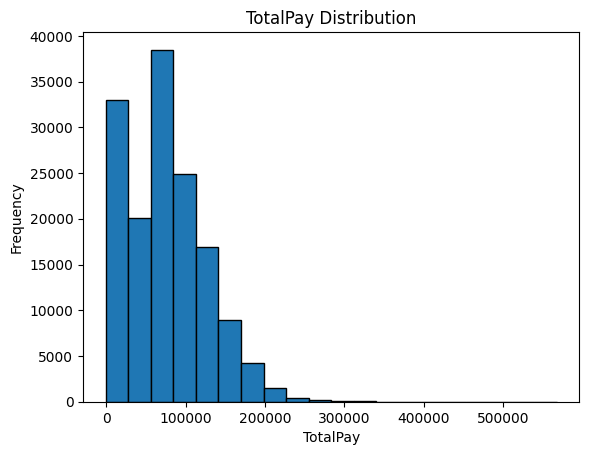

In [38]:
# Eksik verileri ortalama ile doldur
df['TotalPay'] = df['TotalPay'].fillna(df['TotalPay'].mean())

# Histogram çizimi
df['TotalPay'].plot(kind='hist', bins=20, edgecolor='black', title='TotalPay Distribution', xlabel='TotalPay')

# Eksik veri kontrolü
print(df['TotalPay'].isnull().sum())


### Maaş göstergesi ile ilgili analiz yapılacağı için:*  Kategorik sütunlardaki eksik veriler, en sık tekrar eden değer ile doldurulmuştu.
* Sayısal sütunlardaki eksik veriler ise ortalama değer ile doldurulmuştur


* Bu veri setinde istediğim şey ortalama maaş skalası  olduğundan bu şekilde yaptım


# 3. Kategorik Değişken Analizi

In [39]:
df = df_.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


* Kategorik verileri seçerken object olanları seçicem ve bunları df categorical veri seti içine aktaralım

In [40]:
df_categorical = df.select_dtypes(include = "object")
df_categorical.head(10)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,Agency,Status
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,San Francisco,NaN
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,San Francisco,NaN
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,San Francisco,NaN
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,San Francisco,NaN
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,San Francisco,NaN
5,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.0,8601.0,189082.74,NaN,San Francisco,NaN
6,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.9,134426.14,NaN,San Francisco,NaN
7,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.0,51322.5,NaN,San Francisco,NaN
8,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,NaN,San Francisco,NaN
9,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.0,0.0,17115.73,NaN,San Francisco,NaN


 Bu, her kategorik değişken için hangi değerlerin ne sıklıkla tekrarlandığını anlamanıza yardımcı olur.

In [41]:
# Kategorik değişkenlerdeki benzersiz değerlerin sayısı ve frekansları
for col in df_categorical.columns:
    print(f"--- {col} ---")
    print(df_categorical[col].value_counts().head(10))  # İlk 10 değeri göster
    print("\n")


--- EmployeeName ---
EmployeeName
Kevin Lee       13
Richard Lee     11
Steven Lee      11
William Wong    11
Stanley Lee      9
KEVIN LEE        9
Michael Wong     9
John Chan        9
Victor Lee       8
DAVID WONG       8
Name: count, dtype: int64


--- JobTitle ---
JobTitle
Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Custodian                       2418
TRANSIT OPERATOR                2388
Firefighter                     2359
Recreation Leader               1971
Patient Care Assistant          1945
Name: count, dtype: int64


--- BasePay ---
BasePay
0.0         872
0.00        426
54703.00    338
55026.0     297
48472.4     210
65448.0     153
68391.0     152
121068.0    152
88374.0     151
51492.8     143
Name: count, dtype: int64


--- OvertimePay ---
OvertimePay
0.0        57868
0.00       19453
10.68         41
681.23        41
152.13      

* Gözlemler:
EmployeeName:

Bazı isimler (ör. Kevin Lee, Richard Lee) oldukça sık tekrar ediyor.
Verilerde isimlerin birden fazla formatta kaydedildiği görülüyor (ör. Kevin Lee ve KEVIN LEE).
JobTitle:

En sık görülen iş unvanı Transit Operator.
Aynı iş unvanının büyük/küçük harf farkıyla birden fazla kez kaydedildiği (Transit Operator ve TRANSIT OPERATOR) dikkat çekiyor.
BasePay, OvertimePay, OtherPay ve Benefits:

Bu sütunlarda bazı değerin çok sık tekrar ettiği görülüyor (ör. 0.0 ve 0.00).
Muhtemelen bu değerler eksik veri veya gerçek anlamda maaş ödemesi yapılmayan durumları temsil ediyor.
Agency:

Tek bir kategori (San Francisco) mevcut.
Bu sütunun analizde sınırlı bilgi sağlayacağı görülüyor.
Status:

Çalışanların çoğunluğu tam zamanlı (FT) veya yarı zamanlı (PT) olarak sınıflandırılmış.

* Büyük/küçük harf farklarını gidermek için tüm kategorik değerleri standart hale getirmeliyim

In [42]:
df_categorical = df_categorical.apply(lambda x: x.str.upper() if x.dtype == "object" else x)


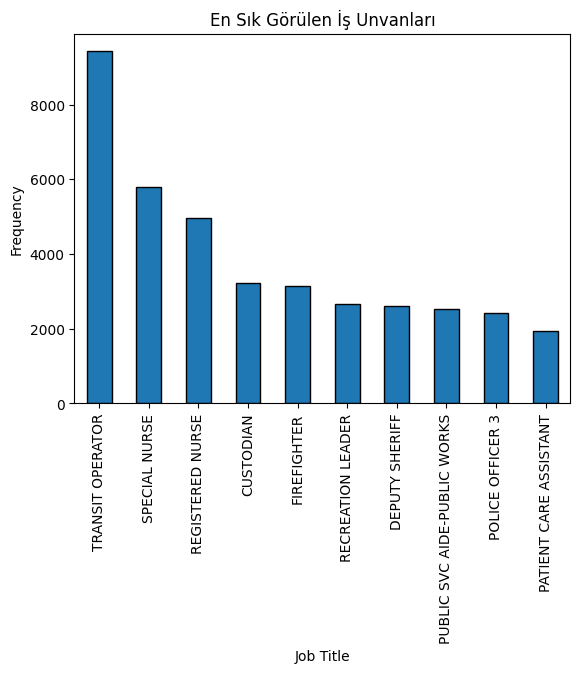

In [43]:
df_categorical['JobTitle'].value_counts().head(10).plot(kind='bar', edgecolor='black')
plt.title('En Sık Görülen İş Unvanları')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.show()


* BasePay, OvertimePay, OtherPay ve Benefits gibi aslında sayısal değerler içermesi gereken sütunlar kategorik olarak gözüküyor. Bu durum temizlenerek bu sütunlar float veri tipine dönüştürülebilir.

In [44]:
df['BasePay'] = pd.to_numeric(df['BasePay'], errors='coerce')
print(df['BasePay'].dtype)


float64


In [45]:
df['OvertimePay'] = pd.to_numeric(df['OvertimePay'], errors='coerce')
df['OtherPay'] = pd.to_numeric(df['OtherPay'], errors='coerce')
df['Benefits'] = pd.to_numeric(df['Benefits'], errors='coerce')
print(df[['OvertimePay', 'OtherPay', 'Benefits']].dtypes)
print(df[['OvertimePay', 'OtherPay', 'Benefits']].head())


OvertimePay    float64
OtherPay       float64
Benefits       float64
dtype: object
   OvertimePay   OtherPay  Benefits
0         0.00  400184.25       NaN
1    245131.88  137811.38       NaN
2    106088.18   16452.60       NaN
3     56120.71  198306.90       NaN
4      9737.00  182234.59       NaN


In [46]:
# Eksik değerleri doldurma işlemi (inplace kullanılmadan)
df['Benefits'] = df['Benefits'].fillna(0)
df['OvertimePay'] = df['OvertimePay'].fillna(df['OvertimePay'].mean())
df['OtherPay'] = df['OtherPay'].fillna(df['OtherPay'].mean())

# Eksik değer kontrolü ve istatistiklerin doğrulanması
print(df[['OvertimePay', 'OtherPay', 'Benefits']].isnull().sum())
print(df[['OvertimePay', 'OtherPay', 'Benefits']].describe())


OvertimePay    0
OtherPay       0
Benefits       0
dtype: int64
         OvertimePay       OtherPay       Benefits
count  148654.000000  148654.000000  148654.000000
mean     5066.059886    3648.767297   18924.232839
std     11454.226449    8056.493470   17165.279495
min        -0.010000   -7058.590000     -33.890000
25%         0.000000       0.000000       0.000000
50%         0.000000     811.350000   23214.020000
75%      4658.667500    4235.907500   33468.980000
max    245131.880000  400184.250000   96570.660000


In [47]:
# Kategorik sütunları seçiyoruz
df_categorical = df.select_dtypes(include=['object'])

# Her bir kategorik değişken için value_counts() kullanıyoruz
for col in df_categorical.columns:
    print(f'{df_categorical[col].value_counts()}\n{"*********"}')


EmployeeName
Kevin Lee                   13
Richard Lee                 11
Steven Lee                  11
William Wong                11
Stanley Lee                  9
                            ..
Jeffrey Skover               1
Ken Dever                    1
Kevin Whitfield              1
Granville McCollough III     1
Joe Lopez                    1
Name: count, Length: 110811, dtype: int64
*********
JobTitle
Transit Operator                                  7036
Special Nurse                                     4389
Registered Nurse                                  3736
Public Svc Aide-Public Works                      2518
Police Officer 3                                  2421
                                                  ... 
CHIEF HOUSING INSPECTOR                              1
TRAFFIC SIGNAL OPERATOR                              1
COURT COMPUTER FACILITIES COORDINATOR                1
AUTOMOTIVE BODY AND FENDER WORKER SUPERVISOR I       1
VICTIM & WITNESS TECHNICIAN        

* EmployeeName sütununda, çalışanların isimlerinin sıklıkları yer almakta. Ancak, bazı isimler (örneğin "Kevin Lee") farklı büyük/küçük harf yazımları nedeniyle birden fazla kez sayılabiliyor. Bu durum, verilerdeki tutarsızlığa yol açabilir. İsimlerin tutarlı bir biçimde analiz edilmesi için büyük/küçük harf farkını ortadan kaldırarak, tüm isimleri küçük harfe dönüştürmek verilerinizi düzenlemenize yardımcı olabilir.

* JobTitle sütununda çok farklı iş unvanları bulunuyor. Bu unvanlar arasında bazıları yalnızca birkaç gözlem içeriyor (mesela yalnızca 1 gözlem olan unvanlar). Bu nadir görülen unvanlar, veri setinde dağılmış ve anlamlı bir analiz için fazla etkili olmayabilir. Bu tür unvanlar için gruplama yaparak daha yaygın olanları birleştirmeniz, analizlerinizi daha anlamlı hale getirebilir. Ayrıca nadir unvanları göz ardı etmek de bir seçenek olabilir.

* Agency sütunu sadece bir ajansı (San Francisco) içeriyor, bu nedenle yalnızca bu ajansa ait 148650 gözlem bulunuyor. Yani, bu sütun veri setinizde fazla değişkenlik sunmuyor, çünkü tüm veriler aynı ajansa ait.

* Status sütununda ise çalışanların tam zamanlı (FT) veya yarı zamanlı (PT) statüleri belirtiliyor. Bu iki kategori arasında belirgin bir fark olduğu için, bu sütun iş gücü yapısını anlamada önemli bir rol oynar. FT ve PT kategorilerindeki sayılar, çalışanların iş türlerini ve verimlilik durumlarını gösterebilir.

In [48]:
# EmployeeName sütunundaki büyük/küçük harf farklarını ortadan kaldırmak için tüm adları küçük harfe dönüştürme
df['EmployeeName'] = df['EmployeeName'].str.lower()

# Kategorik sütunları seçiyoruz
df_categorical = df.select_dtypes(include=['object'])

# Her bir kategorik değişken için value_counts() kullanıyoruz
for col in df_categorical.columns:
    print(f'{df_categorical[col].value_counts()}\n{"*********"}')


EmployeeName
kevin lee           22
richard lee         19
william wong        18
steven lee          18
david wong          16
                    ..
richard  conway      1
allyson a west       1
reuben  schwartz     1
nishil  bali         1
joe lopez            1
Name: count, Length: 80459, dtype: int64
*********
JobTitle
Transit Operator                                  7036
Special Nurse                                     4389
Registered Nurse                                  3736
Public Svc Aide-Public Works                      2518
Police Officer 3                                  2421
                                                  ... 
CHIEF HOUSING INSPECTOR                              1
TRAFFIC SIGNAL OPERATOR                              1
COURT COMPUTER FACILITIES COORDINATOR                1
AUTOMOTIVE BODY AND FENDER WORKER SUPERVISOR I       1
VICTIM & WITNESS TECHNICIAN                          1
Name: count, Length: 2159, dtype: int64
*********
Agency
San Francisc

## 3.2 Kategorik Değişkenlerde Görselleştirme İşlemleri

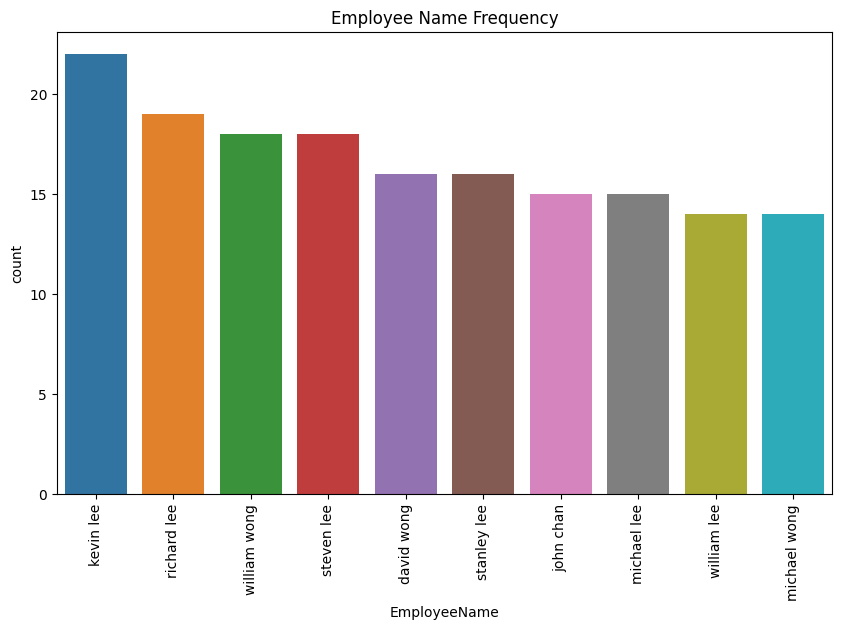

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# EmployeeName sütunu için çubuk grafik
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='EmployeeName', order=df['EmployeeName'].value_counts().index[:10])  # İlk 10 isim
plt.xticks(rotation=90)  # X eksenindeki etiketleri döndürmek
plt.title('Employee Name Frequency')
plt.show()


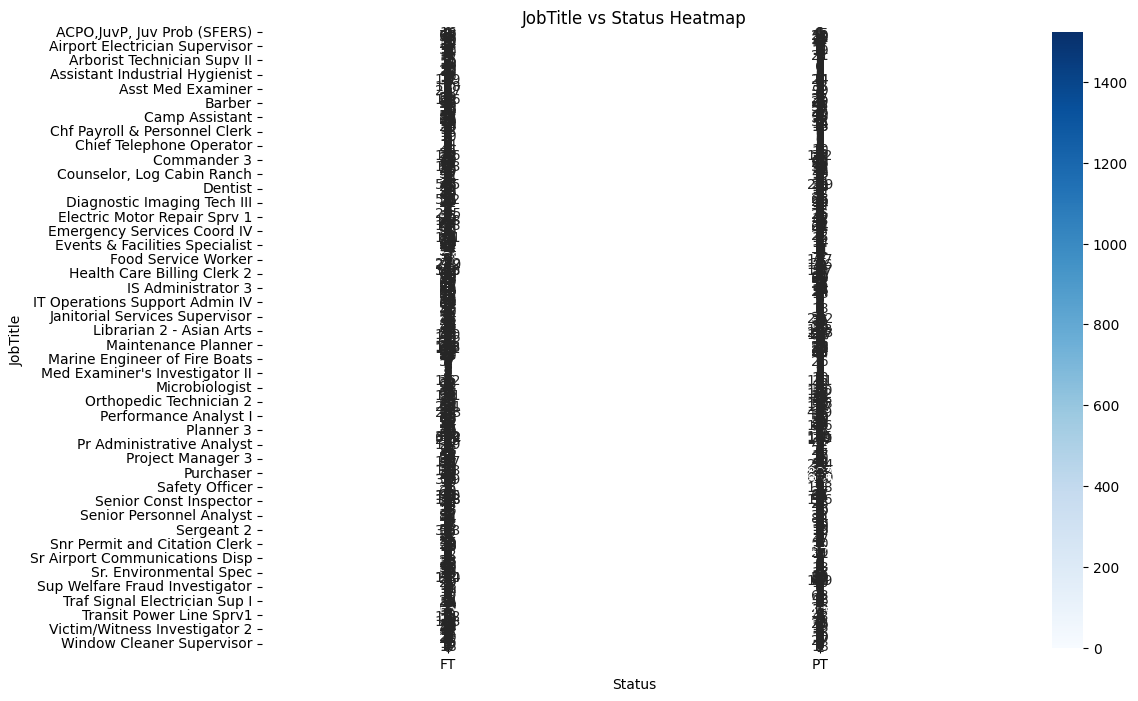

In [50]:
# Kategorik sütunlar arasındaki ilişkiyi görmek için ısı haritası
cross_tab = pd.crosstab(df['JobTitle'], df['Status'])
plt.figure(figsize=(12,8))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d', linewidths=0.5)
plt.title('JobTitle vs Status Heatmap')
plt.show()


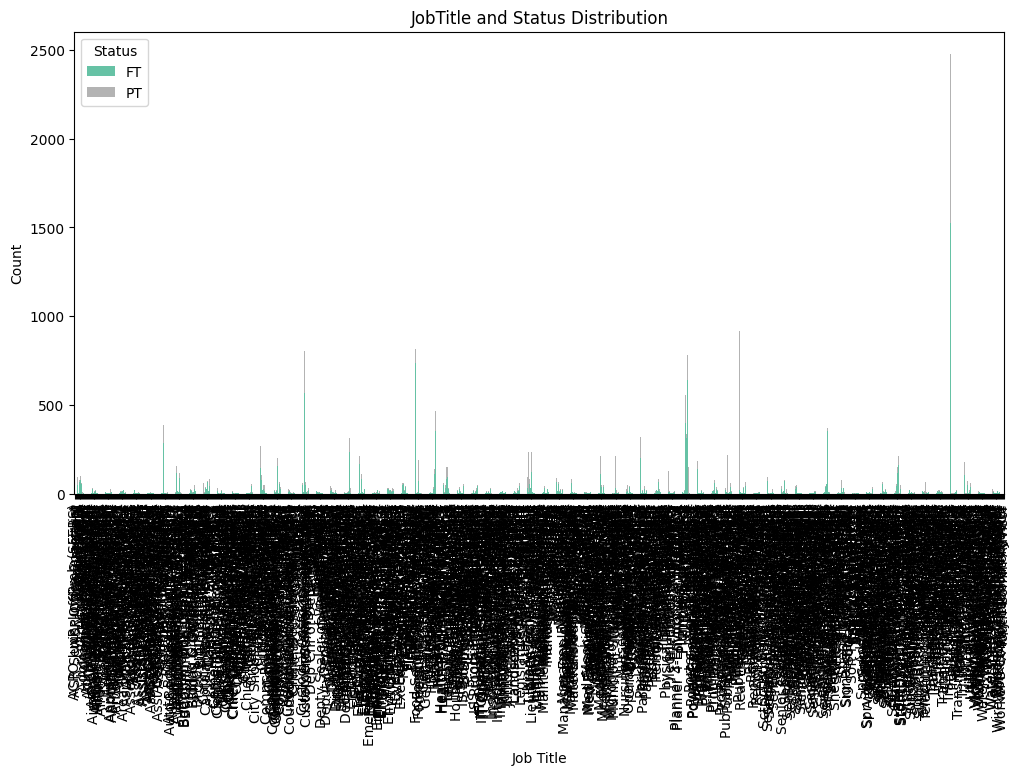

In [51]:
# JobTitle ve Status sütunlarına göre yığılmış çubuk grafik
status_counts = df.groupby(['JobTitle', 'Status']).size().unstack()

status_counts.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
plt.title('JobTitle and Status Distribution')
plt.ylabel('Count')
plt.xlabel('Job Title')
plt.xticks(rotation=90)
plt.show()


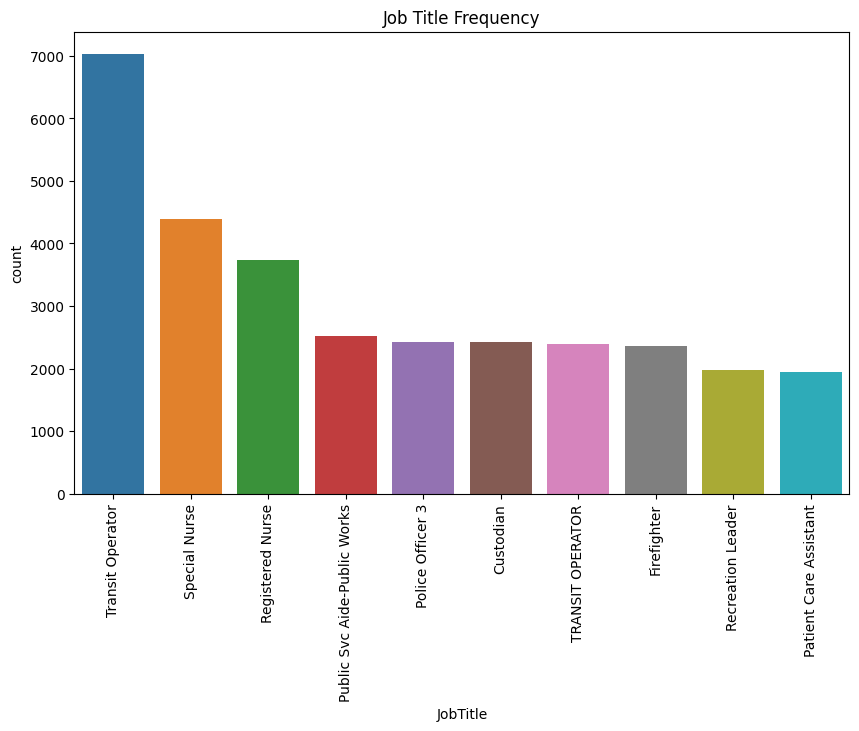

In [52]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='JobTitle', order=df['JobTitle'].value_counts().index[:10])  # İlk 10 iş unvanı
plt.xticks(rotation=90)
plt.title('Job Title Frequency')
plt.show()


## 3.3 Kategorik Gruplama (groupby) İşlemleri

In [53]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,nathaniel ford,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,gary jimenez,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,albert pardini,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,christopher chong,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,patrick gardner,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,NaN,San Francisco,NaN


Id: Çalışanların benzersiz kimlik numarası.

EmployeeName: Çalışanların isimleri.

JobTitle: Çalışanların iş unvanları.

BasePay: Temel maaş (ya da brüt maaş).

OvertimePay: Fazla mesai maaşı.

OtherPay: Diğer maaş ödemeleri (bonuslar, primler vb.).

Benefits: Sağlık sigortası, emeklilik planları vb. faydalar.

TotalPay: Toplam maaş (BasePay, OvertimePay, OtherPay ve Benefits dahil).

TotalPayBenefits: Toplam maaş ve faydaların toplamı (TotalPay + Benefits).

Year: Veri setindeki yıllar (2011 gibi).

Notes: Çalışanlarla ilgili ek notlar (örneğin, maaş artışı durumu gibi).

Agency: Çalışanların ait olduğu ajans (örneğin, "San Francisco").

Status: Çalışanların tam zamanlı (FT) veya yarı zamanlı (PT) oldukları bilgisi.

* İş unvanlarına göre gruplama yaparak her iş unvanı için ortalama maaşları bulmak istiyorum

In [54]:
average_salary_by_job = df.groupby('JobTitle')['BasePay'].mean()
print(average_salary_by_job.head(10))  # İlk 10 iş unvanını görüntüle


JobTitle
ACCOUNT CLERK                       43300.806506
ACCOUNTANT                          46643.172000
ACCOUNTANT INTERN                   28732.663958
ACPO,JuvP, Juv Prob (SFERS)         62290.780000
ACUPUNCTURIST                       66374.400000
ADMINISTRATIVE ANALYST              63435.628602
ADMINISTRATIVE ANALYST II           59373.710000
ADMINISTRATIVE ANALYST III          92698.515000
ADMINISTRATIVE ENGINEER            120913.161000
ADMINISTRATIVE SERVICES MANAGER     75555.033333
Name: BasePay, dtype: float64


ACCOUNT CLERK unvanının ortalama maaşı 43,300.81.

ACCOUNTANT unvanının ortalama maaşı 46,643.17.

ACCOUNTANT INTERN unvanının ortalama maaşı 28,732.66.

* idxmax() ve idxmin() kullanarak her unvanda en yüksek ve en düşük maaşları hangi çalışanların aldığını öğrenelim.

In [55]:
max_salary = df.groupby('JobTitle')['BasePay'].max()
min_salary = df.groupby('JobTitle')['BasePay'].min()
print(max_salary.head(10))
print(min_salary.head(10))


JobTitle
ACCOUNT CLERK                       60838.20
ACCOUNTANT                          65392.01
ACCOUNTANT INTERN                   58501.72
ACPO,JuvP, Juv Prob (SFERS)         62290.78
ACUPUNCTURIST                       66374.40
ADMINISTRATIVE ANALYST              78587.89
ADMINISTRATIVE ANALYST II           75585.82
ADMINISTRATIVE ANALYST III          92847.00
ADMINISTRATIVE ENGINEER            136679.61
ADMINISTRATIVE SERVICES MANAGER     92002.00
Name: BasePay, dtype: float64
JobTitle
ACCOUNT CLERK                        614.00
ACCOUNTANT                             0.00
ACCOUNTANT INTERN                   2981.53
ACPO,JuvP, Juv Prob (SFERS)        62290.78
ACUPUNCTURIST                      66374.40
ADMINISTRATIVE ANALYST                 0.00
ADMINISTRATIVE ANALYST II          43161.60
ADMINISTRATIVE ANALYST III         92550.03
ADMINISTRATIVE ENGINEER            72259.20
ADMINISTRATIVE SERVICES MANAGER    49879.73
Name: BasePay, dtype: float64


ACCOUNT CLERK: En yüksek maaş 60,838.20.

ACCOUNTANT: En yüksek maaş 65,392.01.

ACCOUNTANT INTERN: En yüksek maaş 58,501.72.

ACUPUNCTURIST: En yüksek maaş 66,374.40.

ADMINISTRATIVE ANALYST: En yüksek maaş 78,587.89.

ADMINISTRATIVE ENGINEER: En yüksek maaş 136,679.61.

* Çalışanların statülerine (FT ve PT) göre gruplama yaparak her statüdeki toplam maaşları hesaplamak istiyorum.

In [56]:
total_salary_by_status = df.groupby('Status')['TotalPay'].sum()
print(total_salary_by_status)


Status
FT    2.311698e+09
PT    5.652133e+08
Name: TotalPay, dtype: float64


FT (Full-Time - Tam Zamanlı) çalışanlarının toplam maaşı: 2,311,698,000 (yaklaşık 2.31 milyar).

PT (Part-Time - Yarı Zamanlı) çalışanlarının toplam maaşı: 565,213,300 (yaklaşık 565 milyon).

* Çıkarım:

Tam Zamanlı Çalışanlar (FT): Bu grup, büyük bir toplam maaş miktarına sahip. Bu, tam zamanlı çalışanların sayısının daha fazla olduğunu veya bu gruptaki maaşların ortalama olarak daha yüksek olduğunu gösterebilir.

Yarı Zamanlı Çalışanlar (PT): Bu grubun toplam maaşı daha düşük, bu da yarı zamanlı çalışanların sayısının daha az olduğunu veya maaşlarının daha düşük olduğunu gösterebilir.

* Veri Temizliği: Bazı unvanlar için minimum maaşların sıfır olması, veri hatalarını veya eksik maaş bilgilerini işaret edebilir. Bu durumda, verileri daha dikkatli incelemek gerekebilir. Örneğin, sıfır maaşlara sahip verilerin analiz dışında bırakılması gerekebilir.

* İş Unvanı Bazında Maaş Dağılımı: Her unvan için maaşların dağılımını incelemek (örneğin, medyan maaş, çeyrek dilimler) daha ayrıntılı bir analiz sağlar. Bu, daha anlamlı sonuçlar elde etmenizi sağlar.

* Ekstra Analizler: Maaşların sadece maksimum ve minimum değerleri değil, aynı zamanda ortalama maaş ve medyan maaş gibi istatistikler de önemli olabilir. Bunun için şu tür hesaplamalar yapılabilir:

In [57]:
avg_salary = df.groupby('JobTitle')['BasePay'].mean()
median_salary = df.groupby('JobTitle')['BasePay'].median()
print(avg_salary.head(10))
print(median_salary.head(10))


JobTitle
ACCOUNT CLERK                       43300.806506
ACCOUNTANT                          46643.172000
ACCOUNTANT INTERN                   28732.663958
ACPO,JuvP, Juv Prob (SFERS)         62290.780000
ACUPUNCTURIST                       66374.400000
ADMINISTRATIVE ANALYST              63435.628602
ADMINISTRATIVE ANALYST II           59373.710000
ADMINISTRATIVE ANALYST III          92698.515000
ADMINISTRATIVE ENGINEER            120913.161000
ADMINISTRATIVE SERVICES MANAGER     75555.033333
Name: BasePay, dtype: float64
JobTitle
ACCOUNT CLERK                       49777.780
ACCOUNTANT                          60076.240
ACCOUNTANT INTERN                   16806.755
ACPO,JuvP, Juv Prob (SFERS)         62290.780
ACUPUNCTURIST                       66374.400
ADMINISTRATIVE ANALYST              71602.900
ADMINISTRATIVE ANALYST II           59373.710
ADMINISTRATIVE ANALYST III          92698.515
ADMINISTRATIVE ENGINEER            130171.010
ADMINISTRATIVE SERVICES MANAGER     84783.370
Na

* En Yüksek ve En Düşük Maaşların Görselleştirilmesi

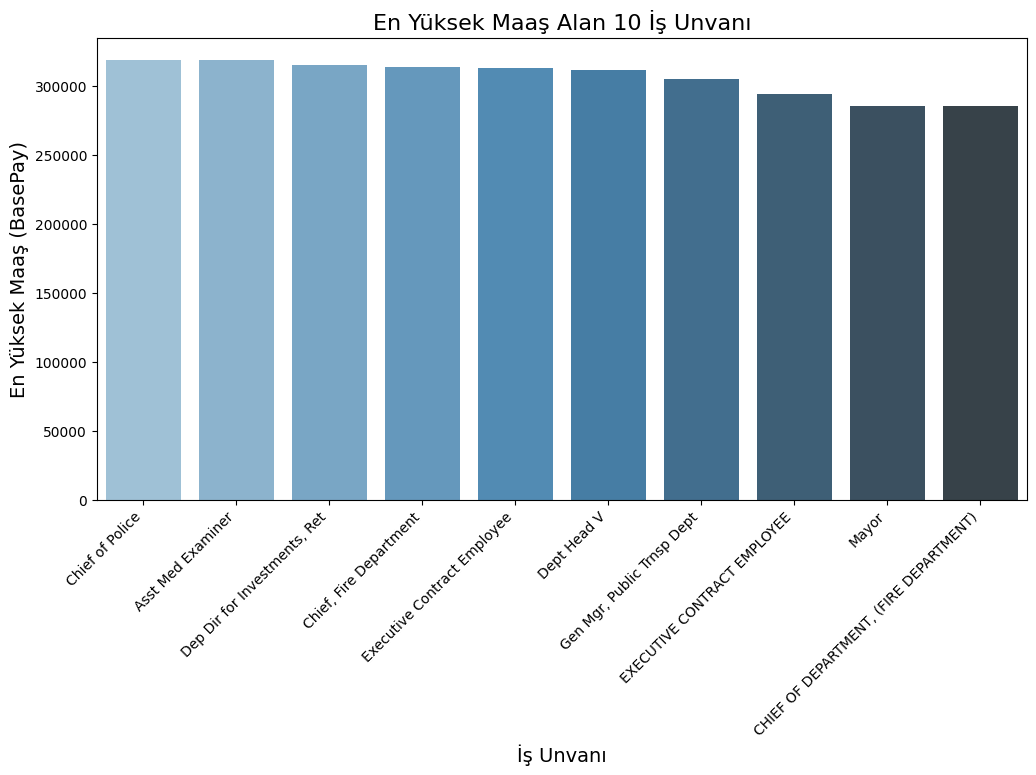

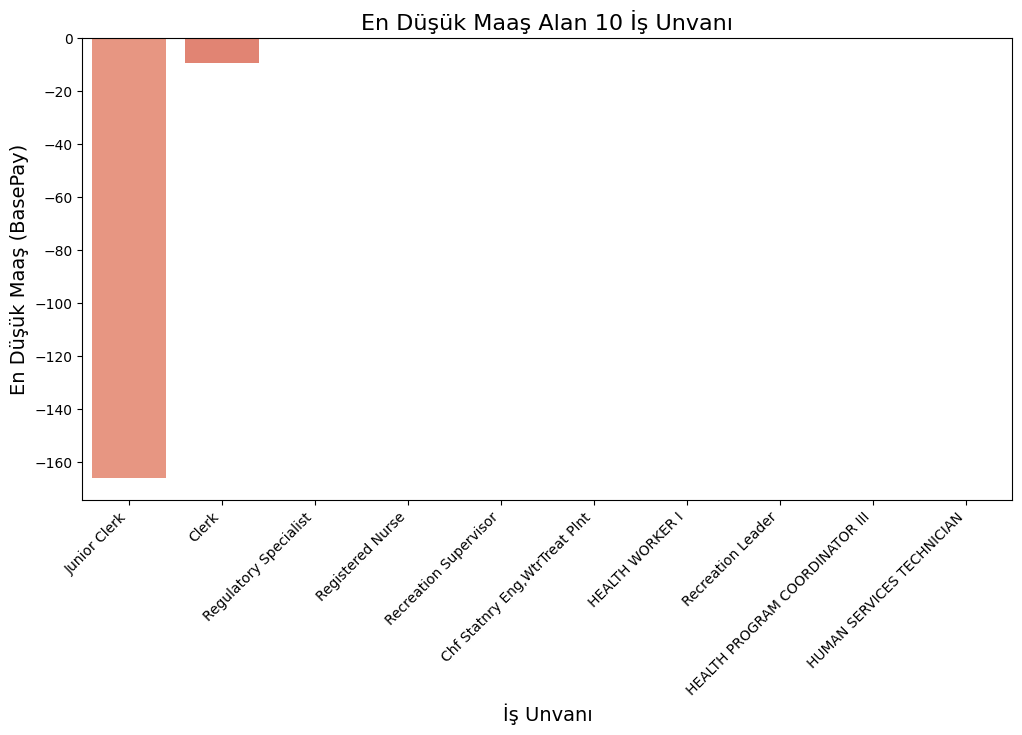

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# En yüksek ve en düşük maaşları seçme
max_salary = df.groupby('JobTitle')['BasePay'].max().sort_values(ascending=False).head(10)
min_salary = df.groupby('JobTitle')['BasePay'].min().sort_values(ascending=True).head(10)

# En yüksek maaşları barplot ile görselleştirme
plt.figure(figsize=(12, 6))
sns.barplot(x=max_salary.index, y=max_salary.values, palette='Blues_d')
plt.xticks(rotation=45, ha='right')
plt.title('En Yüksek Maaş Alan 10 İş Unvanı', fontsize=16)
plt.xlabel('İş Unvanı', fontsize=14)
plt.ylabel('En Yüksek Maaş (BasePay)', fontsize=14)
plt.show()

# En düşük maaşları barplot ile görselleştirme
plt.figure(figsize=(12, 6))
sns.barplot(x=min_salary.index, y=min_salary.values, palette='Reds_d')
plt.xticks(rotation=45, ha='right')
plt.title('En Düşük Maaş Alan 10 İş Unvanı', fontsize=16)
plt.xlabel('İş Unvanı', fontsize=14)
plt.ylabel('En Düşük Maaş (BasePay)', fontsize=14)
plt.show()


* En yüksek maaş alan → Chief of Police
* En düşük maaş alan → junior Clerk

# 4. Sürekli Değişken Analizi

## 4.1 Sürekli Değişkenlerin İncelenmesi

In [59]:
# Sayısal (numerik) sütunları seçme
df_numerical = df.select_dtypes(include=["float64", "int64"])

# İlk birkaç satırı görüntüleme
df_numerical.head()


,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes
0,1,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,NaN
1,2,155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,NaN
2,3,212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,NaN
3,4,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,NaN
4,5,134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,NaN


In [60]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,148654.0,74327.500000,42912.857795,1.00,37164.250,74327.50,111490.7500,148654.00
BasePay,148045.0,66325.448840,42764.635495,-166.01,33588.200,65007.45,94691.0500,319275.01
OvertimePay,148654.0,5066.059886,11454.226449,-0.01,0.000,0.00,4658.6675,245131.88
OtherPay,148654.0,3648.767297,8056.493470,-7058.59,0.000,811.35,4235.9075,400184.25
Benefits,148654.0,18924.232839,17165.279495,-33.89,0.000,23214.02,33468.9800,96570.66
TotalPay,148654.0,74768.321972,50517.005274,-618.13,36168.995,71426.61,105839.1350,567595.43
TotalPayBenefits,148654.0,93692.554811,62793.533483,-618.13,44065.650,92404.09,132876.4500,567595.43
Year,148654.0,2012.522643,1.117538,2011.00,2012.000,2013.00,2014.0000,2014.00
Notes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

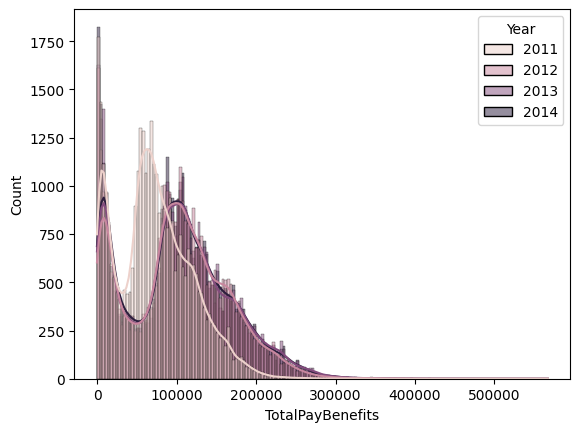

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

#  histogram ve KDE çizimi
sns.histplot(data=df, x="TotalPayBenefits", kde=True, hue="Year")

# Görselleştirmeyi göstermek için plt.show() kullanılır
plt.show()


* Tam anlayamadığım için her yılın maaş dağılımını daha iyi gözlemek istiyorum

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

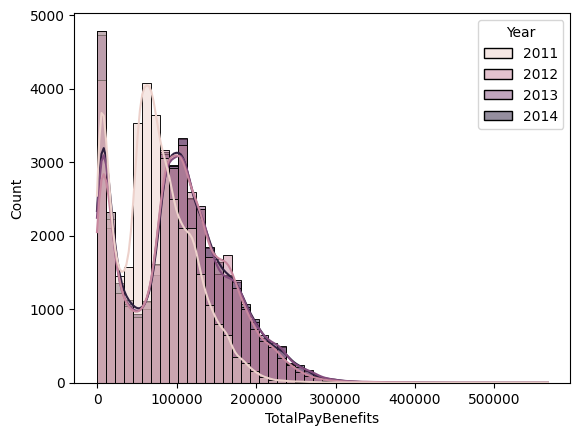

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram ve KDE çizimi (Toplam ödeme veya benzer bir kolon ile)
sns.histplot(data=df, x="TotalPayBenefits", kde=True, hue="Year", bins=50)

# Görselleştirmeyi göstermek için plt.show() kullanılır
plt.show()


* Daha çok her yıl için 1000000 ile 2000000 arasında yayılım olduğunu görüyorum

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


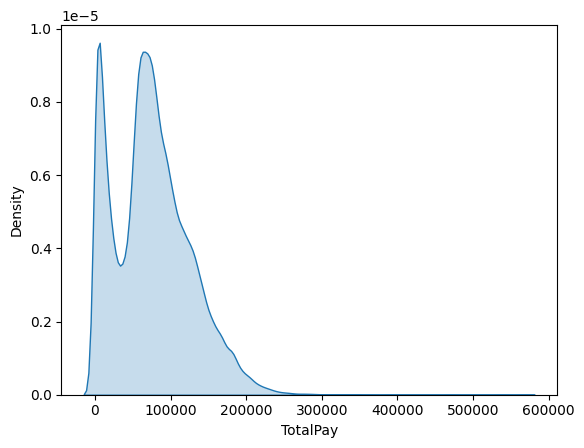

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'TotalPay' için KDE plot çizimi
sns.kdeplot(df['TotalPay'], fill=True)

# Görselleştirmeyi göstermek için plt.show() kullanılır
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

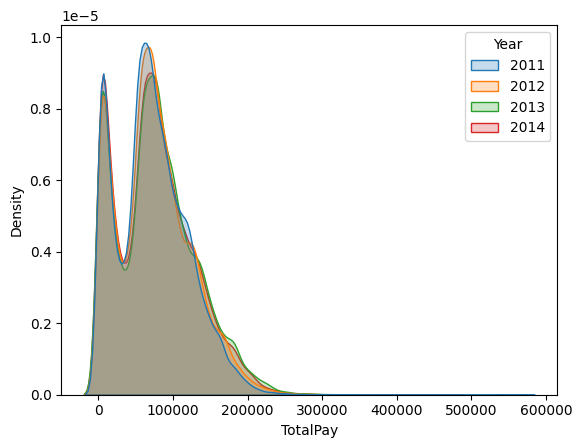

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'Year' kolonunu kategorik (string) yapalım
df['Year'] = df['Year'].astype(str)

# Yıl bazında 'TotalPay' için KDE plot
sns.kdeplot(data=df, x='TotalPay', fill=True, hue='Year', common_norm=False)

# Görselleştirmeyi göstermek için plt.show() kullanılır
plt.show()


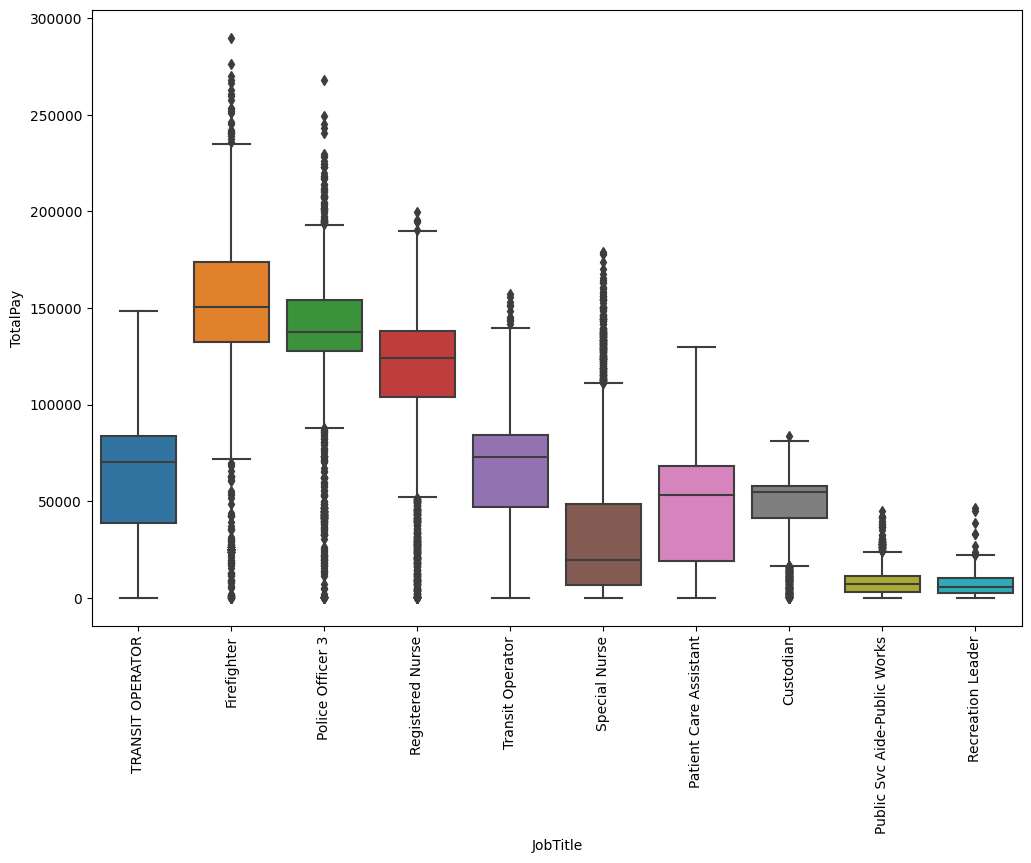

In [75]:
# 'JobTitle' bazında en yaygın 10 başlık ile TotalPay dağılımını göster
top_10_job_titles = df['JobTitle'].value_counts().head(10).index
df_filtered = df[df['JobTitle'].isin(top_10_job_titles)]

# Boxplot kullanarak görselleştirme
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_filtered, x="JobTitle", y="TotalPay")

# Görselleştirmeyi gösteriyoruz
plt.xticks(rotation=90)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

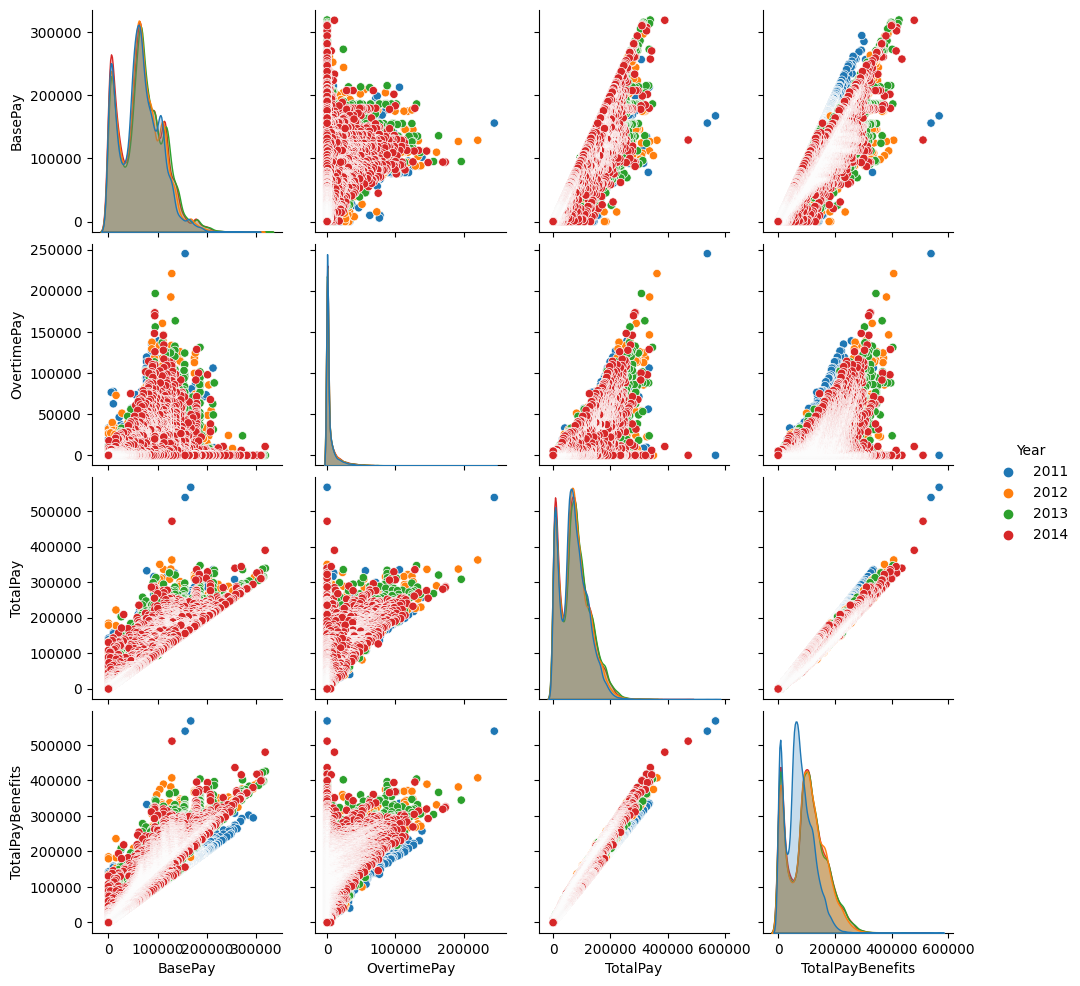

In [76]:
# Sayısal sütunları seçiyoruz
numerical_columns = ['BasePay', 'OvertimePay', 'TotalPay', 'TotalPayBenefits']

# Pairplot oluşturuyoruz
sns.pairplot(df, vars=numerical_columns, hue='Year')

# Görselleştirmeyi gösteriyoruz
plt.show()


* Bir de yalnızca BasePay ve TotalPay görmek istedim

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

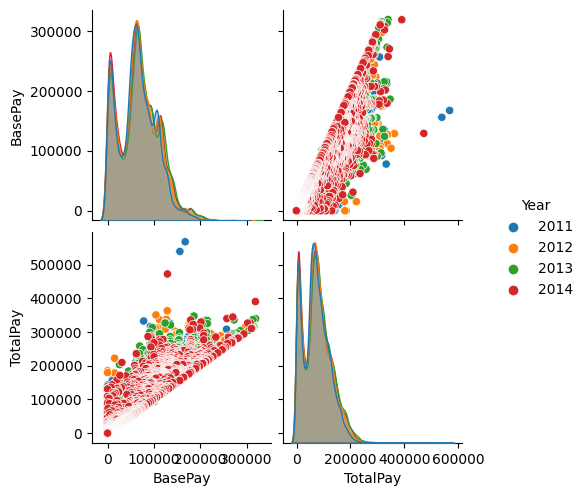

In [79]:
# Yalnızca 'BasePay' ve 'TotalPay' gibi iki sütunu seçiyoruz
numerical_columns = ['BasePay', 'TotalPay']

# Pairplot oluşturuyoruz
sns.pairplot(df, vars=numerical_columns, hue='Year')

# Görselleştirmeyi gösteriyoruz
plt.show()


* 2014 Yılındaki Artış: 2014 yılına ait maaşlar diğer yıllara göre çok daha yüksek görünüyor. Verilerde 0’dan 3 milyon USD’ye kadar maaşların arttığını görüyoruz.

* Sağa Yatay Dağılım: Maaşlar çoğunlukla daha düşük seviyelerde, ama bazı kişiler çok yüksek maaşlar almış. Bu, bazı insanların çok yüksek maaş aldığı, çoğu kişinin ise daha düşük maaş aldığı anlamına geliyor.

* Kırmızı Renginin Fazlalığı: 2014 yılı kırmızı renkte daha fazla yer kaplıyor. Bu, 2014 yılına ait maaşların daha yüksek olduğunu gösteriyor.

* Artan Trend: Yıllar ilerledikçe maaşlar düzenli olarak artmış gibi görünüyor. Yani, 2014’te maaşlar gerçekten yükselmiş ve bu artış belli bir düzende olmuş.

# 5. Feature Engineering

In [80]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,nathaniel ford,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,gary jimenez,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,albert pardini,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,christopher chong,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,patrick gardner,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [81]:
df.describe()  # Temel istatistiksel bilgiler


,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Notes
count,148654.000000,148045.000000,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,66325.448840,5066.059886,3648.767297,18924.232839,74768.321972,93692.554811,NaN
std,42912.857795,42764.635495,11454.226449,8056.493470,17165.279495,50517.005274,62793.533483,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,0.000000,36168.995000,44065.650000,NaN
50%,74327.500000,65007.450000,0.000000,811.350000,23214.020000,71426.610000,92404.090000,NaN
75%,111490.750000,94691.050000,4658.667500,4235.907500,33468.980000,105839.135000,132876.450000,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,NaN


* Yıl Bazında Maaş Artışı Hesaplama
Her yıl için maaş artış oranını hesaplamak, çalışanların kariyerlerinde ne kadar ilerlediklerini görmek açısından faydalı olabilir.

* Yıl Bazında Maaş Artışı: 2011 yılı ile karşılaştırarak her yıl maaş artışı oranını hesaplayabiliriz.

In [85]:
# Verinin ilk birkaç satırını kontrol edelim
print(df.head())

# Önceki yıl maaşlarını buluyoruz (grup bazında ve sıralama ile)
df['Prev_Year_Pay'] = df.sort_values(by=['EmployeeName', 'Year'])['TotalPay'].shift(1)

# Maaş artışı oranını hesaplıyoruz
df['Salary_Increase_Rate'] = (df['TotalPay'] - df['Prev_Year_Pay']) / df['Prev_Year_Pay']

# NaN değerleri sıfırla dolduruyoruz (ilk yıl için maaş artışı hesaplanamaz)
df['Salary_Increase_Rate'] = df['Salary_Increase_Rate'].fillna(0)

# Yeni eklenen sütunları ve ilk birkaç satırı kontrol edelim
print(df[['EmployeeName', 'Year', 'TotalPay', 'Prev_Year_Pay', 'Salary_Increase_Rate']].head())


   Id       EmployeeName                                        JobTitle  \
0   1     nathaniel ford  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2       gary jimenez                 CAPTAIN III (POLICE DEPARTMENT)   
2   3     albert pardini                 CAPTAIN III (POLICE DEPARTMENT)   
3   4  christopher chong            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4   5    patrick gardner    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

     BasePay  OvertimePay   OtherPay  Benefits   TotalPay  TotalPayBenefits  \
0  167411.18         0.00  400184.25       0.0  567595.43         567595.43   
1  155966.02    245131.88  137811.38       0.0  538909.28         538909.28   
2  212739.13    106088.18   16452.60       0.0  335279.91         335279.91   
3   77916.00     56120.71  198306.90       0.0  332343.61         332343.61   
4  134401.60      9737.00  182234.59       0.0  326373.19         326373.19   

   Year  Notes         Agency Status  Prev_Year_Pay  Salary_Increase

In [87]:
# Düşük maaş geçmişine sahip verileri çıkaralım (örn. sıfır veya çok düşük maaşlar)
df_cleaned = df[df['Prev_Year_Pay'] > 1000]  # 1000'den küçük maaş geçmişlerini çıkarıyoruz

# Artış oranı çok yüksek olanları filtreleyelim (örneğin, 10'dan büyük olanlar)
df_cleaned = df_cleaned[df_cleaned['Salary_Increase_Rate'] < 10]

# Temizlenmiş veriyi gözlemleyelim
print(df_cleaned[['EmployeeName', 'Year', 'TotalPay', 'Prev_Year_Pay', 'Salary_Increase_Rate']].head())


      EmployeeName  Year   TotalPay  Prev_Year_Pay  Salary_Increase_Rate
0   nathaniel ford  2011  567595.43       66487.96              7.536815
1     gary jimenez  2011  538909.28      175081.55              2.078047
4  patrick gardner  2011  326373.19      199698.57              0.634329
5   david sullivan  2011  316285.74       57736.19              4.478119
6        alson lee  2011  315981.05       69629.28              3.538049


In [91]:
# Maaş Artışı Kategorisi: Artış oranını "Yüksek", "Orta", "Düşük" olarak kategorilere ayıralım
df_cleaned['Salary_Increase_Category'] = pd.cut(df_cleaned['Salary_Increase_Rate'], 
                                                 bins=[-float('inf'), 1, 3, 5, float('inf')], 
                                                 labels=['Düşük', 'Orta', 'Yüksek', 'Çok Yüksek'])

# Yeni sütunu kontrol edelim
print(df_cleaned[['EmployeeName', 'Salary_Increase_Rate', 'Salary_Increase_Category']].head())


      EmployeeName  Salary_Increase_Rate Salary_Increase_Category
0   nathaniel ford              7.536815               Çok Yüksek
1     gary jimenez              2.078047                     Orta
4  patrick gardner              0.634329                    Düşük
5   david sullivan              4.478119                   Yüksek
6        alson lee              3.538049                   Yüksek


* Veriye baktığımda, maaş artışlarının çalışanlar arasında farklı seviyelerde olduğunu görüyorum. Örneğin, bazı çalışanlar "Çok Yüksek" artış alırken, bazıları "Düşük" artışla kalmış. Bu durum, şirketin maaş düzenlemelerinin eşit olup olmadığını veya belirli gruplara yönelik özel iyileştirmeler yapılıp yapılmadığını gösteriyor. Bu tür kategoriler, maaş politikalarını değerlendirmek ve çalışan memnuniyetini artırmak için önemli olabilir.